In [1]:
'''
Resevoir model:
d/dt u(t) = F_in - F_out
f_out = c*u
c = constant

u(t) = volume at any time
in / out are volume p/time

three lake system:
u0, u1, u2
'''

'\nResevoir model:\nd/dt u(t) = F_in - F_out\nf_out = c*u\nc = constant\n\nu(t) = volume at any time\nin / out are volume p/time\n\nthree lake system:\nu0, u1, u2\n'

In [2]:

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
M = 9
in0 = 0.5 #flux into lake 1 vol/t (eg. L p/day)
c = 0.01 # water loss

In [4]:
# differential equation function

def myfunc(t, u):
    f = np.zeros((M)) # initialize array

    f[0] = in0 - c*u[0]

    for i in range(1,M):
        f[i] = c * u[i-1] - c*u[i]

    return f



In [5]:
# initial conditions all lakes start empty
u0 = np.zeros((M))
dt = 0.1 # eg years
t0 = 0
tmax = 1000
t = np.arange(t0, tmax, dt)
N = np.shape(t)[0] # Number of data points if you need it, not useing it here

In [6]:
sol = solve_ivp(myfunc, [t0, tmax], u0, method='RK45', t_eval=t)

Text(0, 0.5, 'Volume')

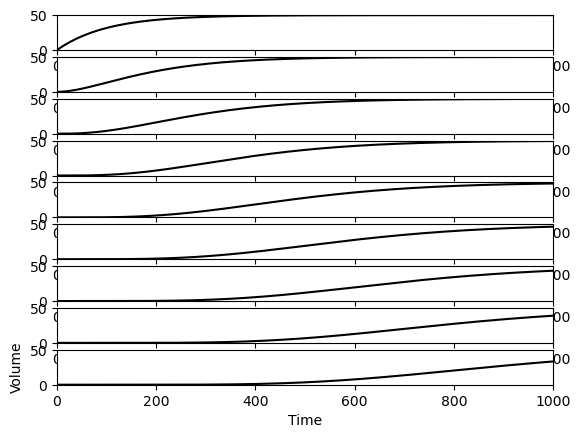

In [7]:
fig = plt.figure()

for i in range(M):
    axi = plt.subplot(M, 1, i+1)
    plt.axis([t0, tmax, 0, 50])
    plt.plot(sol.t, sol.y[i], 'k-')

plt.xlabel('Time')
plt.ylabel('Volume')